C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

ERROR: Could not find a version that satisfies the requirement itertools
ERROR: No matching distribution found for itertools


In [129]:
!python -m pip install --upgrade graphviz

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [214]:
import numpy as np # linear algebra
import spacy
nlp = spacy.load('en_core_web_sm')
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
import re
from collections import Counter
from time import time
# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from nltk.corpus import stopwords
import nltk
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
%matplotlib inline
import heapq
from nltk                            import FreqDist
import gensim
from gensim                          import corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensim
from gensim.models                   import LdaModel
from sklearn.ensemble                import RandomForestClassifier
from sklearn.tree                    import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn.metrics                 import classification_report
from sklearn.pipeline                import FeatureUnion
from sklearn.pipeline                import Pipeline
from sklearn.base                    import BaseEstimator, TransformerMixin
from sklearn.decomposition           import NMF, LatentDirichletAllocation
from sklearn.model_selection         import train_test_split
from sklearn.model_selection         import RandomizedSearchCV
from sklearn                         import metrics
from typing                          import List
from sklearn                         import tree

from xgboost                         import XGBClassifier
from xgboost                         import plot_tree
import graphviz
import itertools

stopwords = stopwords.words('english')
sns.set_context('notebook')

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [131]:
# extra step to allow graphviz to be found 
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/pinba/anaconda3/Library/bin/graphviz'

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [132]:
class ItemSelector(BaseEstimator
                  ,TransformerMixin):
    """
    Parameters
    ----------
    key : hashable, required
        The key corresponding to the desired value in a mappable.
    """
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [133]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()


C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [134]:
def extract_feature_names(model, name) -> List[str]:

    if hasattr(model, "get_feature_names"):
        return model.get_feature_names()
    elif hasattr(model, "n_clusters"):
        return [f"{name}_{x}" for x in range(model.n_clusters)]
    elif hasattr(model, "n_components"):
        return [f"{name}_{x}" for x in range(model.n_components)]
    elif hasattr(model, "components_"):
        n_components = model.components_.shape[0]
        return [f"{name}_{x}" for x in range(n_components)]
    elif hasattr(model, "classes_"):
        return classes_
    else:
        return [name]

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [135]:
#reviews = pd.read_csv("north_avg_reviews - Sheet1.csv", encoding='latin1')
reviews = pd.read_csv("SCHOOL_RATING - Sheet1.csv", encoding='latin1')

reviews = reviews.dropna()

# remove formatting and short stuff
reviews.drop(reviews[reviews.Review.str.len() < 49].index, inplace=True)

print(reviews.shape)
reviews.head(25)


(2399, 6)


C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,RowCount,State,Metro,School,Rating,Review
0,1,OK,Oklahoma City,Edmond Noth,3,I have enjoyed my time at ENHS but the way COV...
4,5,OK,Oklahoma City,Edmond Noth,3,Even while going through my parents' gritty cu...
8,9,OK,Oklahoma City,Edmond Noth,3,Edmond North high school is full of a diverse ...
14,15,OK,Oklahoma City,Edmond Noth,3,North high school has some serious issues with...
18,19,OK,Oklahoma City,Edmond Noth,3,North High School in Torrance is an a decent s...
23,24,OK,Oklahoma City,Edmond Noth,3,"Academically it's a great school, but it's not..."
31,32,OK,Oklahoma City,Edmond Noth,3,Why I wouldn't go to this school if I could do...
35,36,OK,Oklahoma City,Edmond Noth,3,The overall quality of the school itself is ve...
39,40,OK,Oklahoma City,Edmond Noth,3,There are a lot of diverse clubs and groups to...
44,45,OK,Oklahoma City,Edmond Noth,3,"There are many clubs, but most do not particip..."


In [136]:

nlp = spacy.load('en_core_web_lg')
def normalize_text(text):
    tm1 = re.sub('<pre>.*?</pre>', '', text, flags=re.DOTALL)
    tm2 = re.sub('<code>.*?</code>', '', tm1, flags=re.DOTALL)
    tm3 = re.sub('<[^>]+>©', '', tm1, flags=re.DOTALL)
    return tm3.replace("\n", "")

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [137]:
# in this step we are going to remove code syntax from text 
reviews['Review_Cleaned_1'] = reviews['Review'].apply(normalize_text)

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [138]:
punctuations = '!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~©'
# Define function to cleanup text by removing personal pronouns, stopwords, and puncuation
def cleanup_text(docs, logging=False):
    texts = []
    doc = nlp(docs, disable=['parser', 'ner'])
    tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
    tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
    tokens = ' '.join(tokens)
    texts.append(tokens)
    return pd.Series(texts)


reviews['Review_Cleaned'] = reviews['Review_Cleaned_1'].apply(lambda x: cleanup_text(x, False))

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [139]:
def generate_summary(text_without_removing_dot, cleaned_text):
    sample_text = text_without_removing_dot
    doc = nlp(sample_text)
    sentence_list=[]
    for idx, sentence in enumerate(doc.sents): # we are using spacy for sentence tokenization
        sentence_list.append(re.sub(r'[^\w\s]','',str(sentence)))

    stopwords = nltk.corpus.stopwords.words('english')

    word_frequencies = {}  
    for word in nltk.word_tokenize(cleaned_text):  
        if word not in stopwords:
            if word not in word_frequencies.keys():
                word_frequencies[word] = 1
            else:
                word_frequencies[word] += 1


    maximum_frequncy = max(word_frequencies.values())

    for word in word_frequencies.keys():  
        word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)


    sentence_scores = {}  
    for sent in sentence_list:  
        for word in nltk.word_tokenize(sent.lower()):
            if word in word_frequencies.keys():
                if len(sent.split(' ')) < 30:
                    if sent not in sentence_scores.keys():
                        sentence_scores[sent] = word_frequencies[word]
                    else:
                        sentence_scores[sent] += word_frequencies[word]


    summary_sentences = heapq.nlargest(7, sentence_scores, key=sentence_scores.get)

    summary = ' '.join(summary_sentences)
    print("Original Text:\n")
    print(text_without_removing_dot)
    print('\n\nSummarized text:\n')
    print(summary)

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [140]:
# Load model to return language object
nlp = spacy.load('en_core_web_sm')
# Calling nlp on our tweet texts to return a processed Doc for each
reviews['doc'] = [nlp(Review) for Review in reviews.Review]
reviews.sample(3)

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,RowCount,State,Metro,School,Rating,Review,Review_Cleaned_1,Review_Cleaned,doc
6514,6515,IN,Floyd Knobs,Floyd Central,2,Start Your Review of Floyd Central High School...,Start Your Review of Floyd Central High School...,start review floyd central high schoolrate,"(Start, Your, Review, of, Floyd, Central, High..."
989,990,OK,Oklahoma City,Edmond Noth,2,I feel that the teachers give a fair amount of...,I feel that the teachers give a fair amount of...,feel teacher give fair amount homework . say p...,"(I, feel, that, the, teachers, give, a, fair, ..."
8095,8096,IN,Floyd Knobs,Floyd Central,1,The teachers at Floyd Central High School make...,The teachers at Floyd Central High School make...,teacher floyd central high school make sure ch...,"(The, teachers, at, Floyd, Central, High, Scho..."


C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

C:\Users\pinba\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



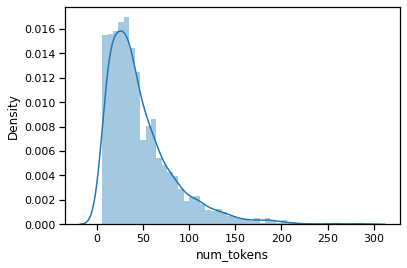

In [141]:
# Sum the number of tokens in each Doc
reviews['num_tokens'] = [len(token) for token in reviews.doc]
# Visualize histogram of tokens per tweet
g = sns.distplot(reviews.num_tokens)

In [142]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



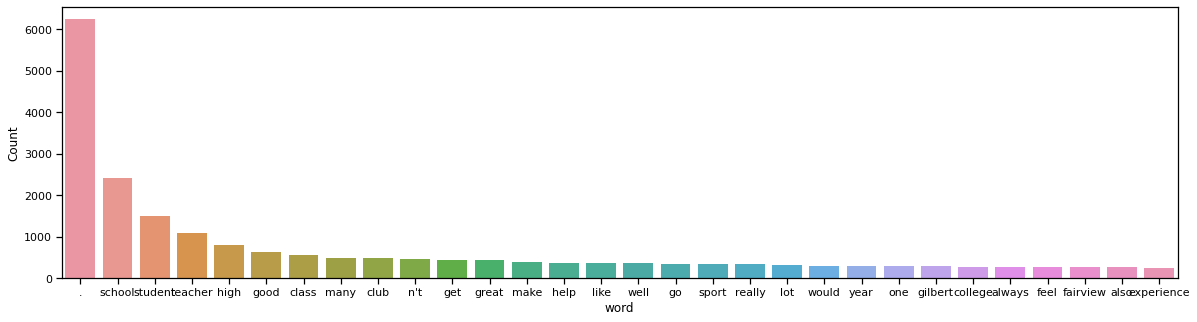

In [143]:
freq_words(reviews['Review_Cleaned'])

In [144]:
# remove unwanted characters, numbers and symbols
reviews['Review_Cleaned'] = reviews['Review_Cleaned'].str.replace("[^a-zA-Z#]", " ")

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-144-f2c53fdd6a2a>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



In [145]:
# function to remove stopwords
def remove_stopwords(rev):
    stop_words = nltk.corpus.stopwords.words('english')
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

reviews_org = reviews

# remove short words (length < 3)
reviews['Review_Cleaned'] = reviews['Review_Cleaned'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in reviews['Review_Cleaned']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



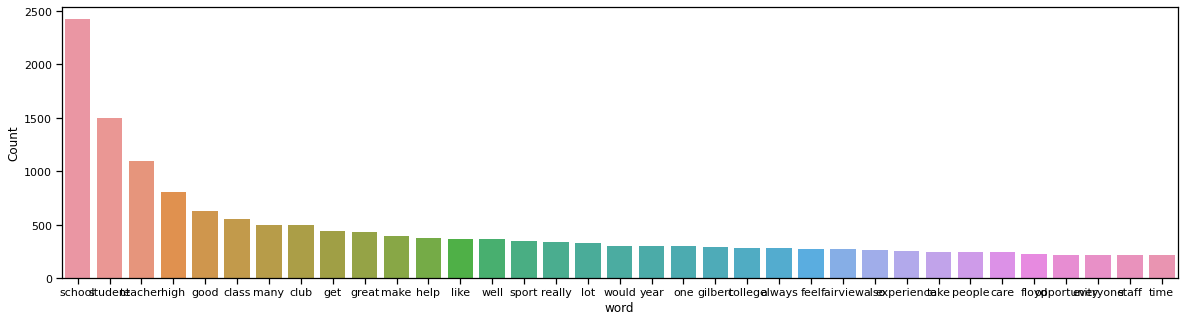

In [146]:
freq_words(reviews, 35)

In [147]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [148]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['even', 'parent', 'gritty', 'custody', 'battle', 'throughout', 'high', 'school', 'edmond', 'north', 'able', 'push', 'graduation', 'many', 'mentionable', 'teacher', 'devout', 'principal', 'attitude', 'personality', 'may', 'always', 'match', 'angry', 'teenager', 'high', 'school', 'authority', 'hold', 'brian', 'excellente', 'mack', 'mitchell', 'rachel', 'gonzales', 'stark', 'move', 'high', 'regard', 'make', 'sure', 'succeed', 'study', 'stay', 'track', 'balto', 'week', 'always', 'beyond', 'memorable', 'strong', 'stand', 'memory', 'much', 'institution', 'could', 'come', 'together', 'charity', 'unite', 'one']


C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [149]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2) # print lemmatized review

print(len(reviews_2))

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[['time', 'way', 'covid', 'teacher', 'nervous', 'counselor', 'long', 'answer', 'simple', 'question'], ['parent', 'gritty', 'custody', 'battle', 'high', 'school', 'edmond', 'north', 'able', 'graduation', 'many', 'mentionable', 'teacher', 'principal', 'attitude', 'personality', 'angry', 'high', 'school', 'authority', 'high', 'regard', 'sure', 'succeed', 'study', 'track', 'balto', 'week', 'memorable', 'strong', 'stand', 'memory', 'much', 'institution', 'charity'], ['school', 'full', 'diverse', 'crowd', 'people', 'club', 'activity', 'willing', 'time', 'jrotc', 'ffa', 'robotic', 'fun', 'half', 'year', 'full', 'meetng', 'new', 'people', 'friendly', 'teacher', 'willing', 'work', 'student', 'sure', 'class'], ['north', 'high', 'school', 'serious', 'issue', 'student', 'safe', 'drug', 'alcohol', 'seat', 'culture', 'freshman', 'senior', 'die', 'car', 'accident', 'due', 'substance', 'abuse', 'serious', 'problem', 'rich', 'student', 'parent', 'fund', 'school', 'say'], ['north', 'high', 'school', 'to

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



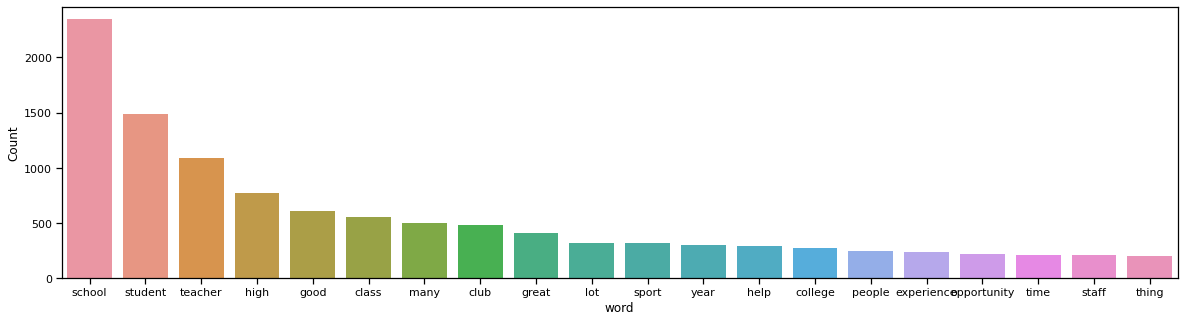

In [150]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

freq_words(reviews_3, 20)

In [151]:
dictionary = corpora.Dictionary(reviews_2)

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [152]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [153]:
# Creating the object for LDA model using gensim library
# LDA = gensim.models.ldamodel.LdaModel
LDA = LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=50)

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [154]:
#lda_model.print_topics(num_words=4)
#lda_model.show_topics(num_words=4)
len(reviews_3)

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



2399

In [155]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.131800 -0.059114       1        1  25.926928
3     -0.116995  0.080770       2        1  20.122491
5     -0.071689 -0.029073       3        1  15.792530
2     -0.108561 -0.141065       4        1  11.986314
4      0.018522  0.123737       5        1  11.493750
1      0.139625  0.188422       6        1   9.361126
0      0.270899 -0.163678       7        1   5.316862, topic_info=        Term         Freq        Total Category  logprob  loglift
7    teacher  1007.000000  1007.000000  Default  30.0000  30.0000
43      club   419.000000   419.000000  Default  29.0000  29.0000
319     food   138.000000   138.000000  Default  28.0000  28.0000
21      high   666.000000   666.000000  Default  27.0000  27.0000
42     class   520.000000   520.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
33    school    23.700498  2069.710235   Topic7  -4.3143  -1.5354
40      week     8.872338    40.348993   Topic7  -5.2968   1.4197
159    smart     7.301392    17.116398   Topic7  -5.4917   2.0823
8       time     8.654876   205.782964   Topic7  -5.3216  -0.2344
54    people     8.659042   236.489032   Topic7  -5.3211  -0.3730

[443 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
378       1  0.444255  academic
378       2  0.194674  academic
378       4  0.359397  academic
693       5  0.902314       act
1083      7  0.799160    action
...     ...       ...       ...
59        4  0.003628      year
59        5  0.126963      year
59        6  0.007255      year
941       3  0.101182     young
941       5  0.809452     young

[656 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 4, 6, 3, 5, 2, 1])

In [156]:
type(reviews_org)

reviews_4 = np.hstack((reviews_org
           ,pd.DataFrame(reviews_3,columns=['Topic_LDA'])))

reviews_4 = pd.DataFrame(reviews_4,columns=['org_idx', 'State', 'City'
                                           , 'School', 'Rating'
                                           , 'Raw_Review', 'PreProcessed_Review', 'Processed_Review', 'Flat_Review', 'Tokens', 'Topic_Review'])

reviews_4.head()

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,org_idx,State,City,School,Rating,Raw_Review,PreProcessed_Review,Processed_Review,Flat_Review,Tokens,Topic_Review
0,1,OK,Oklahoma City,Edmond Noth,3,I have enjoyed my time at ENHS but the way COV...,I have enjoyed my time at ENHS but the way COV...,enjoy time enhs way covid handle teacher leave...,"(I, have, enjoyed, my, time, at, ENHS, but, th...",44,time way covid teacher nervous counselor long ...
1,5,OK,Oklahoma City,Edmond Noth,3,Even while going through my parents' gritty cu...,Even while going through my parents' gritty cu...,even parent gritty custody battle throughout h...,"(Even, while, going, through, my, parents, ', ...",121,parent gritty custody battle high school edmon...
2,9,OK,Oklahoma City,Edmond Noth,3,Edmond North high school is full of a diverse ...,Edmond North high school is full of a diverse ...,edmond north high school full diverse crowd pe...,"(Edmond, North, high, school, is, full, of, a,...",94,school full diverse crowd people club activity...
3,15,OK,Oklahoma City,Edmond Noth,3,North high school has some serious issues with...,North high school has some serious issues with...,north high school serious issue keep student g...,"(North, high, school, has, some, serious, issu...",67,north high school serious issue student safe d...
4,19,OK,Oklahoma City,Edmond Noth,3,North High School in Torrance is an a decent s...,North High School in Torrance is an a decent s...,north high school torrance decent school teach...,"(North, High, School, in, Torrance, is, an, a,...",22,north high school torrance decent school teach...


In [157]:
#clf = RandomForestClassifier(max_depth=2, random_state=0)
#X=np.array(reviews_3).reshape(-1, 1)
#y=reviews_org['Rating']
#clf.fit(X, y)

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [158]:
reviews_4['Rating']

# low rating
#reviews_4['Rating_binary'] = reviews_4['Rating'].apply(lambda x: 1 if x > 3 else 0)

reviews_4['Rating_binary'] = reviews_4['Rating'].apply(lambda x: 1 if x > 3 else 0)

# high rating
# reviews_4['Rating_binary'] = reviews_4['Rating'].apply(lambda x: 1 if x < 2 else 0)

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [159]:

## wrapper to support numerical quant hyper-parameters
def parameter_type_conv(parameter
                       ,parameter_type):
    if parameter_type == 'int':
        return round(parameter, 0)
    else:
        return parameter

    
## generate array to support hierarchial hyper-parameterization    
def auto_term_frequency_max(parameter_array_seed
                           ,parameter_max
                           ,parameter_min
                           ,parameter_seed_rate
                           ,parameter_type
                           ,print_result): 
    
    
    hyper_parameter_array = (
                                 parameter_type_conv(parameter_array_seed*(1-(parameter_seed_rate*2))
                                                    ,parameter_type)
                                ,parameter_type_conv(parameter_array_seed*(1-(parameter_seed_rate*1))
                                                    ,parameter_type)
                                ,parameter_type_conv(parameter_array_seed
                                                    ,parameter_type)
                                ,parameter_type_conv(parameter_array_seed*(1+(parameter_seed_rate*1))
                                                    ,parameter_type)        
                                ,parameter_type_conv(parameter_array_seed*(1+(parameter_seed_rate*2))
                                                    ,parameter_type) )
    
    
    
    if print_result:
        print(hyper_parameter_array)
    
    return hyper_parameter_array
    

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [160]:

auto_term_frequency_max(.5        # seed value, previous nominal hyper-parameter
                       ,2         # hyper-parameter(s) max value
                       ,0         # hyper-parameter(s) min value
                       ,0.2       # hyper-parameter(s) range growth rate
                       ,'float'   # output numerical type (float/int)
                       ,True)     # print array for all the people to see

(0.3, 0.4, 0.5, 0.6, 0.7)


C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(0.3, 0.4, 0.5, 0.6, 0.7)

In [161]:
#y=reviews_4['Rating']
y=reviews_4['Rating_binary']
y=y.astype('int')

X=reviews_4[['Raw_Review']].fillna('BLANK')


C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [230]:
pipeline = Pipeline([

    # Use FeatureUnion to combine the features from subject and body
    ('union', FeatureUnion(
        transformer_list=[

            # Categorical Preprocessors
            # ('repo_preprocessor', preprocessor),
            
                 
            # INCIDENT CLOSE NOTES PIPELINE
            ('review', Pipeline([
                ('selector', ItemSelector(key='Raw_Review')),
                ('vectorizer', 'passthrough'),
                ('lda', LatentDirichletAllocation(
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0))
            ])),                  

        ],

    )),
    
    # classifier place holder
    ('classifier', XGBClassifier())

])

#pipeline = Pipeline('contestants': ['hash', 'count', 'tfidf']])

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [231]:
def auto_paramterization(comment_term_freq):
    
    parameters = [
        {'union__review__vectorizer':                      [HashingVectorizer()],
            'union__review__vectorizer__stop_words':       ('english', None),

            # ngram ranges         
            'union__review__vectorizer__ngram_range':      ((1, 1)        # force single term
                                                           ,(1, 4)        # full spectrum up-to 4 term combination 
                                                           ,(2, 4)),      # force combination

            'classifier':                                  [XGBClassifier()],
        },
                  
                   
                  
        {
            #'union__review__vectorizer':                   [CountVectorizer()],
            'union__review__vectorizer':                   [TfidfVectorizer()],
            'union__review__vectorizer__stop_words':       ('english', None),   
            #'union__review__vectorizer__analyzer':         ('word', 'char', 'char_wb'),

            # max term document frequecn#y
            'union__review__vectorizer__max_df':           comment_term_freq,  
            
            # max features in term frequency 
            'union__review__vectorizer__max_features':     (100, 1000, 10000),            
                       
            # ngram ranges         
            'union__review__vectorizer__ngram_range':      ((1, 1)        # force single term
                                                           ,(1, 4)        # full spectrum up-to 4 term combination 
                                                           ,(2, 4)),      # force combination        

            'classifier':                                  [XGBClassifier()],
        },
              
        {
            'union__review__vectorizer':                   [TfidfVectorizer()],
            'union__review__vectorizer__stop_words':       ('english', None),    
            
            # max term document frequecn#y
            'union__review__vectorizer__max_df':           comment_term_freq,  
            
            # max features in term frequency 
            'union__review__vectorizer__max_features':     (100, 1000, 10000),                  

            # ngram ranges         
            'union__review__vectorizer__ngram_range':      ((1, 1)        # force single term
                                                           ,(1, 4)        # full spectrum up-to 4 term combination 
                                                           ,(2, 4)),      # force combination        

            'classifier':                                  [XGBClassifier()],
        }]
    



    return parameters

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [166]:
evolution_domain = (0.6, 0.7, 0.8)

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [186]:
#param_name
type(auto_paramterization(auto_max_term_frq))

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



tuple

In [177]:
classifier_iterator_preload = 2

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [232]:
# initialize timer
t0_total = time()

# broad search seed
auto_max_term_frq = (0.9, .6, .3, .1, .01)
test_train_enabled=False

for evolution_state in evolution_domain:

    # initialize timer
    t0 = time()

    # check if test train enabled
    if test_train_enabled:
        # training set evolver
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=evolution_state)
    else:
        X_train=X; X_test=X
        y_train=y; y_test=y

    # switch between GRID and RANDOM searches
    #grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)
    grid_search = RandomizedSearchCV(pipeline
                                    , auto_paramterization(auto_max_term_frq)[1]
                                    #, parameters 
                                    , n_jobs=-1
                                    , verbose=1
                                    , n_iter=classifier_iterator_preload*evolution_state
                                    , scoring='accuracy')

    # fit gridsearch / pipeline
    grid_search.fit(X_train, y_train)

    # search metrics
    print("search iteration train ratio %0.3f rows %0.1f" % (0.1 ,len(y_train)))
    print("done in %0.3fs" % (time() - t0))
    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")

    # grid search parameters
    best_parameters = grid_search.best_estimator_.get_params()

    # loop through each parameter, displaying top result
    i=0
    #for param_name in sorted(parameters[0]):
    for param_name in sorted(auto_paramterization(auto_max_term_frq)[1]):
        print("(%r): \t%s  %r" % (i, param_name, best_parameters[param_name]))
        
        # record recent heights
        # if param_name = 'union__review__vectorizer__max_df':
        if 'union__review__vectorizer__max_df' in param_name:
            auto_max_term_frq = (
                                 auto_term_frequency_max(best_parameters[param_name]  # seed value, previous nominal hyper-parameter
                                                         ,2                           # hyper-parameter(s) max value
                                                         ,0                           # hyper-parameter(s) min value
                                                         ,0.2                         # hyper-parameter(s) range growth rate
                                                         ,'float'                     # output numerical type (float/int)
                                                         ,False)                      # print hyper parameter array?
                                )
            print("Iterative Adjusted Term Freq Ranges")
            print(auto_max_term_frq)
        i=i+1

    y_pred = grid_search.predict(X_test)
    print("")
    print("confusion matrix")
    print(metrics.confusion_matrix(y_test, y_pred))
    print("accuracy score")
    print(metrics.accuracy_score(y_test, y_pred))
    print("## iteration end #####################################")
    #print(classification_report(y_pred, y_test))

   
print("")
print("")
print("Total runtime %s" % (time() - t0_total))


C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\pinba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[08:45:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
search iteration train ratio 0.100 rows 2399.0
done in 7.227s
Best score: 0.937
Best parameters set:
(0): 	classifier  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbo

C:\Users\pinba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[08:45:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
search iteration train ratio 0.100 rows 2399.0
done in 7.430s
Best score: 0.927
Best parameters set:
(0): 	classifier  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbo

C:\Users\pinba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[08:45:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
search iteration train ratio 0.100 rows 2399.0
done in 4.120s
Best score: 0.940
Best parameters set:
(0): 	classifier  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbo

In [169]:
# LDA Top Topics
# lda = dict(grid_search.best_estimator_.named_steps['union'].transformer_list).get('review').named_steps['lda']
clf = grid_search.best_estimator_.named_steps['classifier']
feature_names = dict(grid_search.best_estimator_.named_steps['union'].transformer_list).get('review').named_steps['vectorizer'].get_feature_names()

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [170]:
print(clf)
#fig, ax = plt.subplots(figsize=(30, 30))
#xgb.plot_tree(model, num_trees=4, ax=ax)
#plt.show()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [171]:
#plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
#tree.plot_tree(clf, fontsize=10)
#XGBClassifier().plot_tree(clf, num_trees=4, ax=ax)

#tree.plot_tree(clf);
#plt.show()




C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [233]:
# Topic Importance (output)

# latent d. hyper parameter
lda = dict(grid_search.best_estimator_.named_steps['union'].transformer_list).get('review').named_steps['lda']

# vectorizer hyper parameter
vectorizer = dict(grid_search.best_estimator_.named_steps['union'].transformer_list).get('review').named_steps['vectorizer']
vectorizer_type = str(print(vectorizer))

# get feature names based on vectorizer type
if 'CountVectorizer' in vectorizer_type:
    
    print('CountVectorizer')
    #feature_names = sorted(vectorizer.vocabulary_.keys())
    feature_names = vectorizer.get_feature_names()
    
elif 'TfidfVectorizer' in vectorizer_type:
    print('TfidfVectorizer')
    feature_names = vectorizer.get_feature_names()
else:
    print('Unknown Vectorizer')
    feature_names = sorted(vectorizer.vocabulary_.keys())
    
# print top topics / features
print_top_words(lda
               ,feature_names
               ,6)


TfidfVectorizer(max_df=0.0112, max_features=100, stop_words='english')
Unknown Vectorizer
Topic #0: absolutely, administrators, attended, trouble, science, town
Topic #1: types, workload, homework, provide, children, taking
Topic #2: liked, gets, memories, honestly, girls, range
Topic #3: issue, nurse, eat, supportive, guards, peer
Topic #4: wouldn, caring, knowledgeable, ask, white, theatre
Topic #5: generally, dedicated, questions, working, possible, interested
Topic #6: career, awesome, subject, regular, welcoming, strong
Topic #7: fine, unique, decent, policy, preparing, set
Topic #8: provides, choir, interests, cares, create, play
Topic #9: incredible, provided, fact, fit, bit, fair



C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [173]:
vectorizer_type = str(print(vectorizer))


TfidfVectorizer(max_df=0.9, max_features=1000, ngram_range=(1, 4))


C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



comment_nlp_topic__0    0.104398
comment_nlp_topic__1    0.121753
comment_nlp_topic__2    0.118407
comment_nlp_topic__3    0.093147
comment_nlp_topic__4    0.078350
comment_nlp_topic__5    0.079184
comment_nlp_topic__6    0.098100
comment_nlp_topic__7    0.109300
comment_nlp_topic__8    0.090877
comment_nlp_topic__9    0.106486
dtype: float32


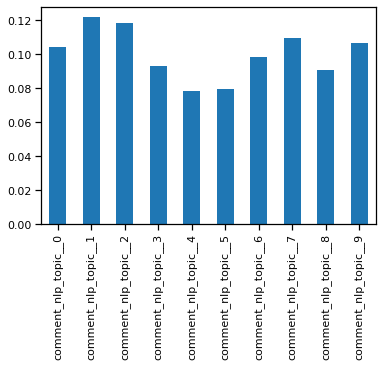

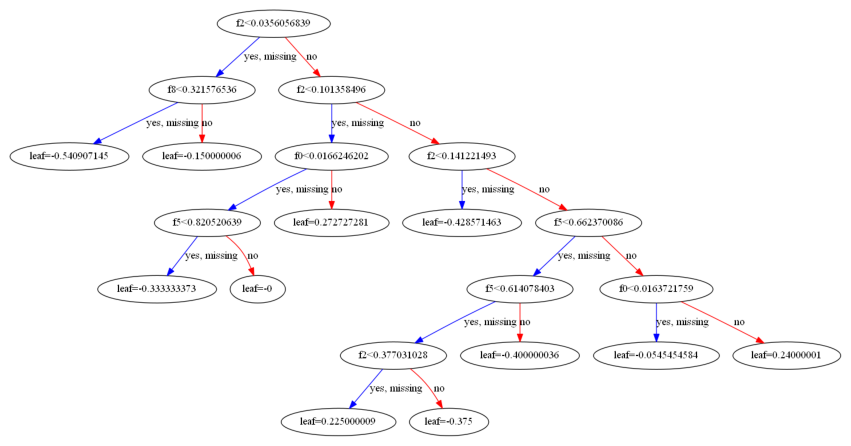

In [234]:
#print(grid_search.best_estimator_.named_steps['classifier'].feature_importances_)
#feature_names = grid_search.best_estimator_.named_steps['classifier'].get_feature_names()

clf_feature_importance = grid_search.best_estimator_.named_steps['classifier'].feature_importances_
#print(len(clf_feature_importance))

#encoded_categorical_features = dict(grid_search.best_estimator_.named_steps['union'].transformer_list).get('repo_preprocessor').transformers_[1][1].get_feature_names()

# capture comment nlp topics
comment_nlp_model = dict(grid_search.best_estimator_.named_steps['union'].transformer_list).get('review').named_steps['lda']
comment_nlp_topics = extract_feature_names(comment_nlp_model
                                          , 'comment_nlp_topic_')

features = np.array(list(comment_nlp_topics))

feature_importance = pd.Series(data=clf_feature_importance
                               , index = features )

print(feature_importance)
type(feature_importance)
feature_importance.plot.bar()

#plot_tree(clf)
#plt.show()

fig, ax = plt.subplots(figsize=(15, 15))
#xgb.plot_tree(clf, num_trees=4, ax=ax)
plot_tree(clf, ax=ax)
plt.show()


In [235]:
  # parrallel hyper-parameterization
def make_param_grids(steps, param_grids):

    final_params=[]

    # Itertools.product will do a permutation such that 
    # (pca OR svd) AND (svm OR rf) will become ->
    # (pca, svm) , (pca, rf) , (svd, svm) , (svd, rf)
    for estimator_names in itertools.product(*steps.values()):
        current_grid = {}

        # Step_name and estimator_name should correspond
        # i.e preprocessor must be from pca and select.
        for step_name, estimator_name in zip(steps.keys(), estimator_names):
            for param, value in param_grids.get(estimator_name).items():
                
                # detect object
                if param == 'object':
                    # Set actual estimator in pipeline
                    current_grid[step_name]=[value]
                else:
                    # Set parameters corresponding to above estimator
                    current_grid[step_name+'__'+param]=value
        #Append this dictionary to final params            
        final_params.append(current_grid)

    return final_params

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [304]:
# add all the estimators you want to "OR" in single key
# use OR between `pca` and `select`, 
# use OR between `svm` and `rf`
# different keys will be evaluated as serial estimator in pipeline

('selector', ItemSelector(key='Raw_Review')),


pipeline_steps = {'selector_switch':['switch'],                 
                  'preprocessor':   ['tfidf', 'count'],
                  'topicizer':      ['lda', 'passthrough'],                   
                  'classifier':     ['xgb', 'rf']}

# fill parameters to be searched in this dict
all_param_grids = {'xgb':{'object':           XGBClassifier(),
                          'n_estimators':     (10, 20)
                         }, 
                   
                   
                   'rf':{'object':            RandomForestClassifier(),
                         'n_estimators':      (10, 200)
                        },

                   
                   'tfidf':{'object':         TfidfVectorizer(),
                          'max_features':     (100, 1000, 10000),
                          'stop_words':       ('english', None), 
                          'ngram_range':      ((1, 1)        # force single term
                                              ,(1, 4)        # full spectrum up-to 4 term combination 
                                              ,(2, 4)),      # force combination    
                         },
                   
                   ## passthrough mech.
                   'passthrough':{'object': 'passthrough'},                   

                   
                   'count':{'object':CountVectorizer(),
                             'max_features':  (100, 1000, 10000)
                            },
                   
                   'lda':{'object': LatentDirichletAllocation(
                                    learning_method='online',
                                    learning_offset=50.,
                                    random_state=0)},
                   
                   'switch':{'object': ItemSelector(key='Raw_Review')}                   
                  }  


# Call the method on the above declared variables
param_grids_list = make_param_grids(pipeline_steps, all_param_grids)

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [305]:
# The PCA() and SVC() used here are just to initialize the pipeline,
# actual estimators will be used from our `param_grids_list`
pipe = Pipeline(steps=[('selector_switch','passthrough')
                       , ('preprocessor', 'passthrough')
                       , ('topicizer',    'passthrough')
                       , ('classifier',   'passthrough')])  

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [308]:
grid_search = RandomizedSearchCV(pipe
                                 , param_grids_list
                                 , n_iter=5
                                 , scoring='accuracy')
print(param_grids_list)
param_grids_list


[{'selector_switch': [ItemSelector(key='Raw_Review')], 'preprocessor': [TfidfVectorizer()], 'preprocessor__max_features': (100, 1000, 10000), 'preprocessor__stop_words': ('english', None), 'preprocessor__ngram_range': ((1, 1), (1, 4), (2, 4)), 'topicizer': [LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          random_state=0)], 'classifier': [XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[{'selector_switch': [ItemSelector(key='Raw_Review')],
  'preprocessor': [TfidfVectorizer()],
  'preprocessor__max_features': (100, 1000, 10000),
  'preprocessor__stop_words': ('english', None),
  'preprocessor__ngram_range': ((1, 1), (1, 4), (2, 4)),
  'topicizer': [LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                             random_state=0)],
  'classifier': [XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                 colsample_bynode=None, colsample_bytree=None, gamma=None,
                 gpu_id=None, importance_type='gain', interaction_constraints=None,
                 learning_rate=None, max_delta_step=None, max_depth=None,
                 min_child_weight=None, missing=nan, monotone_constraints=None,
                 n_estimators=100, n_jobs=None, num_parallel_tree=None,
                 random_state=None, reg_alpha=None, reg_lambda=None,
                 scale_pos_weight=None, subsample=None, tree_method=Non

In [309]:
# fit gridsearch / pipeline
grid_search.fit(X, y)

# search metrics
print("search iteration train ratio %0.3f rows %0.1f" % (0.1 ,len(y_train)))
print("done in %0.3fs" % (time() - t0))
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")

# grid search parameters
best_parameters = grid_search.best_estimator_.get_params()

# loop through each parameter, displaying top result
i=0
#for param_name in sorted(parameters[0]):
for param_name in sorted(param_grids_list[0]):
    print("(%r): \t%s  %r" % (i, param_name, best_parameters[param_name]))

    # record recent heights
    # if param_name = 'union__review__vectorizer__max_df':
    if 'union__review__vectorizer__max_df' in param_name:
        auto_max_term_frq = (
                             auto_term_frequency_max(best_parameters[param_name]  # seed value, previous nominal hyper-parameter
                                                     ,2                           # hyper-parameter(s) max value
                                                     ,0                           # hyper-parameter(s) min value
                                                     ,0.2                         # hyper-parameter(s) range growth rate
                                                     ,'float'                     # output numerical type (float/int)
                                                     ,False)                      # print hyper parameter array?
                            )
        print("Iterative Adjusted Term Freq Ranges")
        print(auto_max_term_frq)
    i=i+1

y_pred = grid_search.predict(X_test)
print("")
print("confusion matrix")
print(metrics.confusion_matrix(y_test, y_pred))
print("accuracy score")
print(metrics.accuracy_score(y_test, y_pred))
print("## iteration end #####################################")
#print(classification_report(y_pred, y_test))

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

C:\Users\pinba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:23:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pinba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:23:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pinba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:23:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pinba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:23:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pinba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:24:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pinba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:24:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pinba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:24:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pinba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:24:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pinba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:24:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pinba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:24:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pinba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:24:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
search iteration train ratio 0.100 rows 2399.0
done in 5920.085s
Best score: 0.943
Best parameters set:
(0): 	classifier  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, ver

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



it is very           0.031312
the food             0.026597
trying to            0.025608
needs to             0.025026
by the               0.023918
should be            0.022854
this school          0.022486
the cafeteria        0.022292
and even             0.022036
to go                0.021960
do not               0.021886
did not              0.021599
focus on             0.021471
administration is    0.021408
not really           0.021400
like they            0.021070
could be             0.019951
of the school        0.019942
to know              0.019788
know how             0.019765
dtype: float32

In [318]:
# determine nlp factors (ex. if topicizer and/or vectorizer is used)

best_topicizer = grid_search.best_estimator_.named_steps['topicizer']

best_preprocessor = grid_search.best_estimator_.named_steps['preprocessor']

# check if topicizer is used
if best_topicizer == 'passthrough':
    best_factors = best_preprocessor
else:
    best_factors = best_topicizer

best_factors

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



TfidfVectorizer(max_features=1000, ngram_range=(2, 4))

In [373]:
best_preprocessor.get_feature_names()

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



['able to',
 'about the',
 'about the students',
 'about their',
 'about their students',
 'about their students and',
 'above and',
 'above and beyond',
 'academics and',
 'academics are',
 'activities and',
 'activities are',
 'activities to',
 'administration is',
 'advanced classes',
 'after school',
 'albany high',
 'albany high school',
 'albany senior',
 'albany senior high',
 'albany senior high schoolrate',
 'all of',
 'all of the',
 'all students',
 'all the',
 'all the teachers',
 'all very',
 'almost all',
 'almost every',
 'along with',
 'also have',
 'always available',
 'amazing teachers',
 'amount of',
 'an amazing',
 'and activities',
 'and all',
 'and always',
 'and am',
 'and are',
 'and beyond',
 'and can',
 'and do',
 'and don',
 'and even',
 'and every',
 'and everyone',
 'and faculty',
 'and feel',
 'and get',
 'and great',
 'and has',
 'and have',
 'and help',
 'and helpful',
 'and how',
 'and if',
 'and in',
 'and is',
 'and it',
 'and it is',
 'and make',
 'an

In [381]:
clf_feature_importance = grid_search.best_estimator_.named_steps['classifier'].feature_importances_
clf_feature_importance 



features = np.array(list(best_preprocessor.get_feature_names()))

feature_importance = pd.Series(data=clf_feature_importance
                               , index = features )


feature_importance.sort_values(ascending=False).head(20)

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



it is very           0.031312
the food             0.026597
trying to            0.025608
needs to             0.025026
by the               0.023918
should be            0.022854
this school          0.022486
the cafeteria        0.022292
and even             0.022036
to go                0.021960
do not               0.021886
did not              0.021599
focus on             0.021471
administration is    0.021408
not really           0.021400
like they            0.021070
could be             0.019951
of the school        0.019942
to know              0.019788
know how             0.019765
dtype: float32

In [369]:
# Topic Importance (output)

# latent d. hyper parameter
#lda = dict(grid_search.best_estimator_.named_steps['union'].transformer_list).get('review').named_steps['lda']
topicizer = grid_search.best_estimator_.named_steps['topicizer']
topicizer_type = type(topicizer).__name__


# vectorizer hyper parameter
#vectorizer = dict(grid_search.best_estimator_.named_steps['union'].transformer_list).get('review').named_steps['vectorizer']
vectorizer = grid_search.best_estimator_.named_steps['preprocessor']
vectorizer_type = type(vectorizer).__name__
print(type(vectorizer).__name__)

# get feature names based on vectorizer type
if 'CountVectorizer' in vectorizer_type:
    
    print('CountVectorizer')
    feature_names = vectorizer.get_feature_names()
    
elif 'TfidfVectorizer' in vectorizer_type:
    print('TfidfVectorizer')
    feature_names = vectorizer.get_feature_names()
else:
    print('Unknown Vectorizer')
    feature_names = sorted(vectorizer.vocabulary_.keys())

print(topicizer_type)
    
if "str" in topicizer_type:
    print('passthrough topic')
    
else:
    # print top topics / features
    print_top_words(lda
                   ,feature_names
                   ,6)


TfidfVectorizer
TfidfVectorizer
str
passthrough topic


C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [301]:
#print(best_parameters)
best_parameters

C:\Users\pinba\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



{'memory': None,
 'steps': [('selector_switch', ItemSelector(key='Raw_Review')),
  ('preprocessor', TfidfVectorizer(max_features=1000, ngram_range=(2, 4))),
  ('topicizer', 'passthrough'),
  ('classifier',
   XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                 colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                 importance_type='gain', interaction_constraints='',
                 learning_rate=0.300000012, max_delta_step=0, max_depth=6,
                 min_child_weight=1, missing=nan, monotone_constraints='()',
                 n_estimators=10, n_jobs=4, num_parallel_tree=1, random_state=0,
                 reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                 tree_method='exact', validate_parameters=1, verbosity=None))],
 'verbose': False,
 'selector_switch': ItemSelector(key='Raw_Review'),
 'preprocessor': TfidfVectorizer(max_features=1000, ngram_range=(2, 4)),
 'topicizer': 'passthrough',
 'classifier'